In [1]:
%matplotlib notebook
import matplotlib.pyplot as pl
import numpy as np

Tue May 10 18:11:49 2022 Photon 100/100000
Tue May 10 18:11:49 2022 Photon 1000/100000
Tue May 10 18:11:53 2022 Photon 10000/100000
Tue May 10 18:12:31 2022 Photon 100000/100000
0.4 ms per photon

Geometry and material
'Layer' (0.0000,0.0000,0.0000) with surfaces ['Front' normal:(-0.0000,-0.0000,-1.0000), 'Back' normal:(0.0000,0.0000,1.0000)]
Material: µs=5.5 µa=0.54 g=0.0 n=1

Physical quantities
Transmittance [Front] : 50.4% 
Transmittance [Front] : 49.8% of total power
Transmittance [Back] : 0.2% 
Transmittance [Back] : 0.2% of total power
Absorbance : 49.4%
Absorbance : 48.8%
Absorbance + Transmittance = 100.0%


<IPython.core.display.Javascript object>


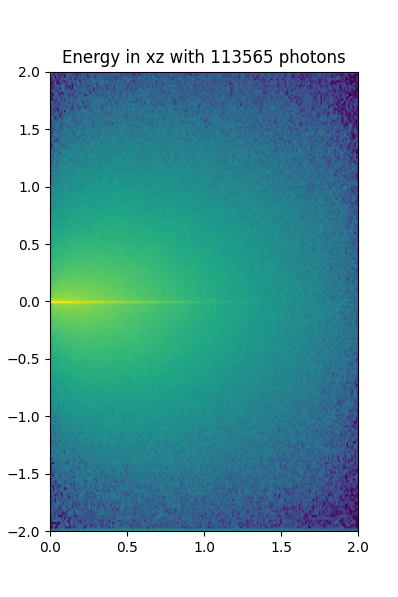

<IPython.core.display.Javascript object>


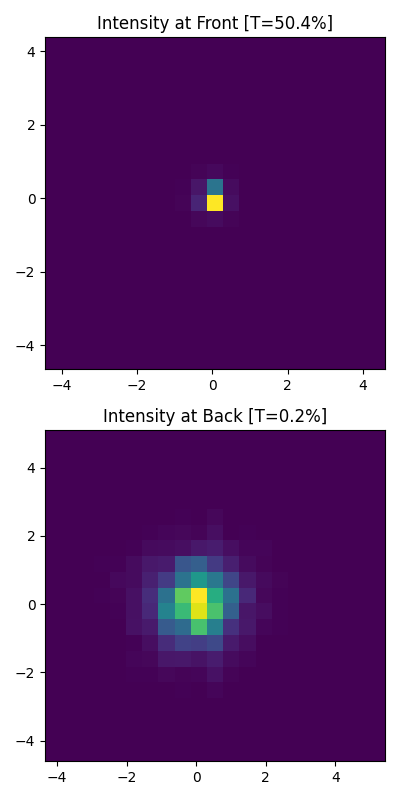

In [2]:
from pytissueoptics import *

world = World()
# We choose a material with scattering properties
mat    = Material(mu_s=5.5, mu_a = 0.54, g = 0.0, index = 1)

# We want stats: we must determine over what volume we want the energy
stats  = Stats(min = (-2,-2,0), max = (2,2,2), size = (200,200,200))

# We pick a light source
source = PencilSource(direction=UnitVector(0,0,1), maxCount=100000)

# We pick a geometry
tissue = Layer(thickness=2, material=mat, stats=stats)

# We propagate the photons from the source inside the geometry
world.place(source, position=Vector(0,0,-1))
world.place(tissue, position=Vector(0,0,0))

world.compute(graphs=False)

# Report the results for all geometries
world.report()

In [3]:
mua = 0.54
mus = 5.5
mueff = (3 * mua * (mua + mus))**0.5
l = np.linspace(0, 2, 1000)
photonFlux = np.exp(-mueff * l)

<IPython.core.display.Javascript object>


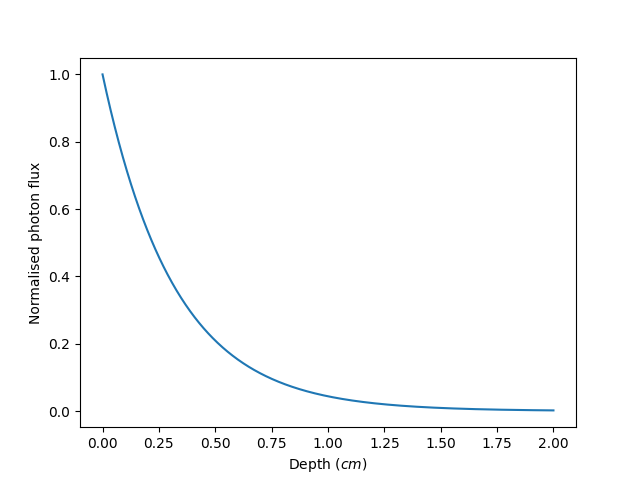

In [4]:
pl.plot(l, photonFlux)
pl.xlabel('Depth $(cm)$')
pl.ylabel('Normalised photon flux')
pl.show()

In [4]:
10**(1.28)/10**(4.9)

0.00023988329190194888